In [1]:
from python_libs.dataset import RoseParser, Protocol, Record, SingleDatasource
from python_libs.image import show_landmarks, load_image
from python_libs.video import get_video_info_file
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
import numpy as np

/home/equipo/Insync/arnoldjair@gmail.com/GoogleDrive/Desarrollo/python_libs/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train, test = Protocol.get_protocol("/home/equipo/Insync/arnoldjair@gmail.com/GoogleDrive/Desarrollo/python_libs/configs/unit_test.json")

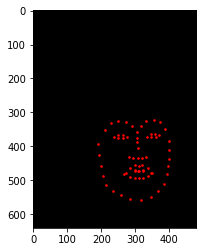

In [3]:
record_0 = train[0]
video_info_path = f'{record_0.video_path}.info'
[rot, width, height, fps] = get_video_info_file(video_info_path)
image_0 = np.zeros([int(height), int(width),3],dtype=np.uint8)
landmarks_0 = record_0.get_landmarks(time=300, reshape=False)
show_landmarks(image_0, landmarks_0[0])

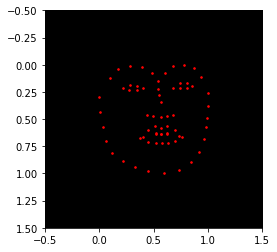

In [4]:


landmarks_0_1 = landmarks_0[0].T
scaler = MinMaxScaler()
landmarks_0_1_res =   scaler.fit_transform(landmarks_0_1).T
image_0_1 = np.zeros([int(2), int(2),3],dtype=np.uint8)
show_landmarks(image_0_1, landmarks_0_1_res)

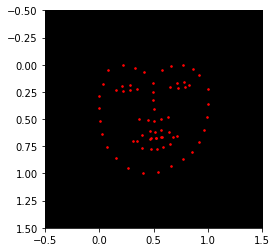

In [7]:
record_1 = train[1]
landmarks_1 = record_1.get_landmarks(time=300, reshape=False, scale=True)
image_1_1 = np.zeros([int(2), int(2),3],dtype=np.uint8)
show_landmarks(image_1_1, landmarks_1[0])

In [6]:
record = train[0]
loaded = record.load(300, samples=30)

In [7]:
import numpy as np 
print(f'flow shape: {record.flow[1].shape}, landmarks shape: {record.landmarks.shape}, rep shape: {loaded.shape}')
landmarks = record.landmarks   

flow shape: (52, 52, 2), landmarks shape: (30, 136), rep shape: (30, 5544)


No module named 'alt_cuda_corr'


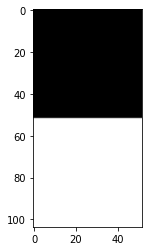

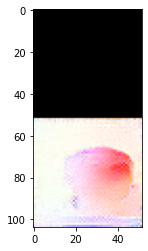

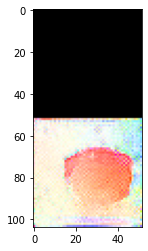

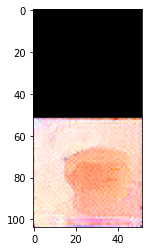

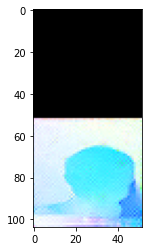

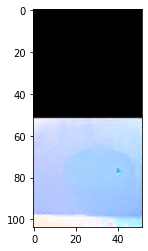

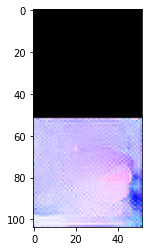

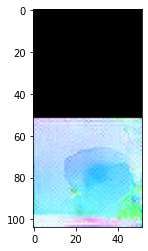

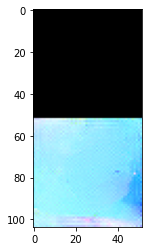

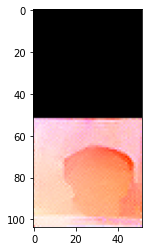

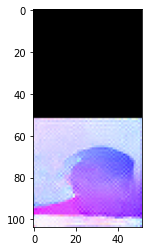

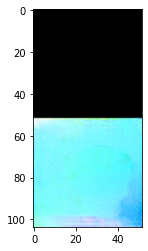

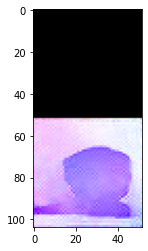

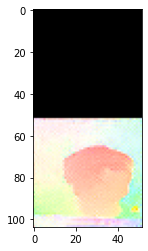

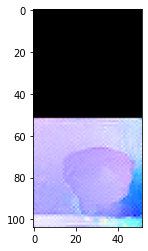

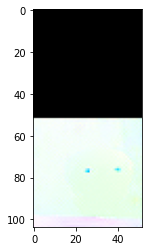

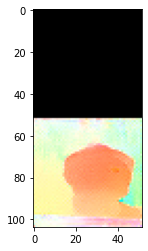

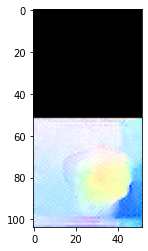

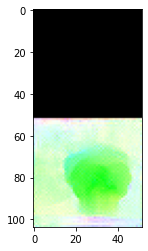

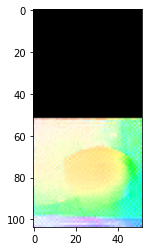

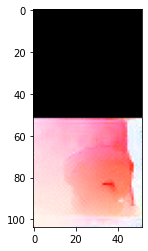

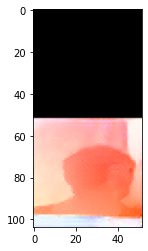

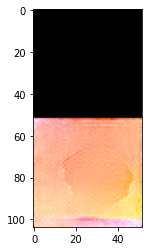

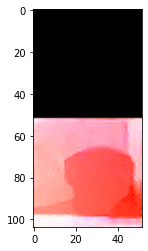

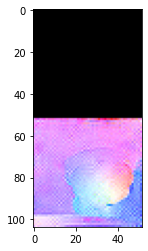

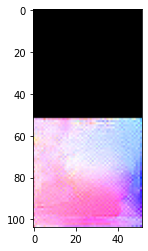

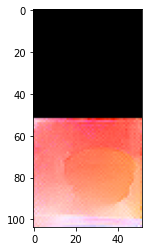

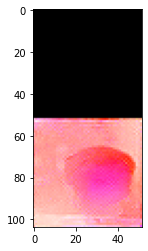

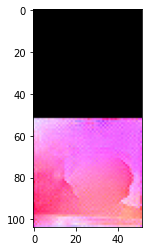

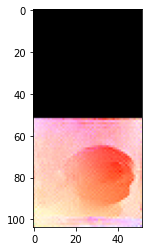

In [8]:
import torch
import numpy as np
from python_libs.optical_flow import RaftModel
from python_libs.image import load_image

for flow in record.flow:
    flo = torch.from_numpy(flow).permute(2, 0, 1).unsqueeze(0)
    frame = torch.from_numpy(
                    np.zeros([52,52,3],dtype=np.uint8)
                ).permute(2, 0, 1).float().unsqueeze(0)
    RaftModel.visualize_flow(frame, flo)

In [ ]:
dev_datasource = SingleDatasource(train)
test_datasource = SingleDatasource(test)
dev_labels = [current[-1] for current in dev_datasource]
test_labels = [current[-1] for current in test_datasource]


In [ ]:
print(dev_labels)
print(test_labels)